# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [68]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [69]:
# 設定 data_path
dir_data = '/Users/rogeredc/Documents/GitHub/ML100-Days/part1/data'

In [ ]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/rogeredc/Documents/GitHub/ML100-Days/part1/data/application_train.csv


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [62]:
for i in range(app_train['CNT_CHILDREN'].max()+1):
    print('{} 個小孩: {}'.format(i,sum(app_train["CNT_CHILDREN"] == i)))

0 個小孩: 215371
1 個小孩: 61119
2 個小孩: 26749
3 個小孩: 3717
4 個小孩: 429
5 個小孩: 84
6 個小孩: 21
7 個小孩: 7
8 個小孩: 2
9 個小孩: 2
10 個小孩: 2
11 個小孩: 1
12 個小孩: 2
13 個小孩: 0
14 個小孩: 3
15 個小孩: 0
16 個小孩: 0
17 個小孩: 0
18 個小孩: 0
19 個小孩: 2


In [63]:
#1
cut_rule = [-1,0,2,5,app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [64]:
#2-1
"""
Your code here
"""
grp = 'CNT_CHILDREN_GROUP','TARGET'

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  import sys


CNT_CHILDREN_GROUP  TARGET
(-1.001, 0.0]       0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 19.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

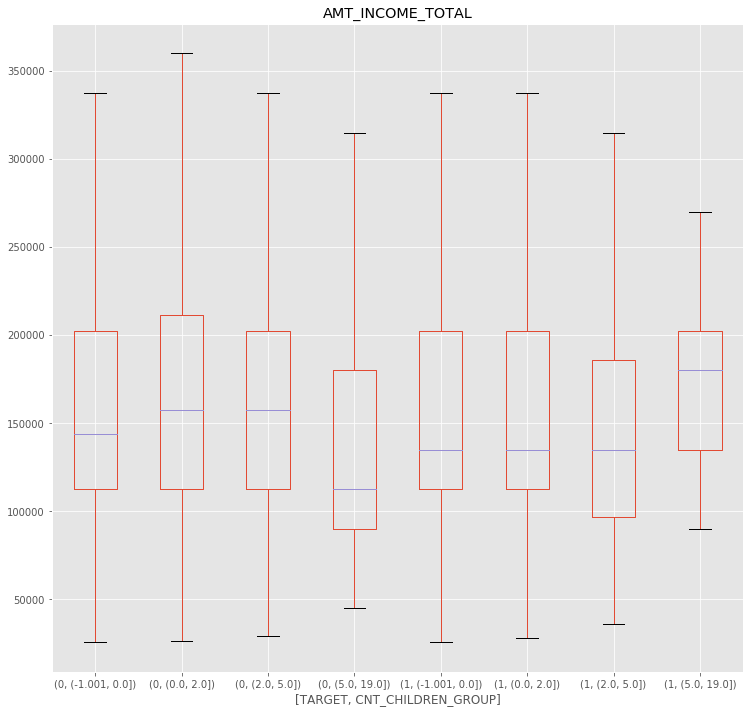

In [65]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['TARGET','CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [66]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std() )
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


In [67]:
def first_n(df,n=3):
    return df[0:n]
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'].apply(first_n,n=2)


AMT_INCOME_TOTAL  \
CNT_CHILDREN_GROUP TARGET                           
(-1.001, 0.0]      0      1              270000.0   
                          2               67500.0   
                   1      0              202500.0   
                          26             112500.0   
(0.0, 2.0]         0      6              171000.0   
                          10             112500.0   
                   1      110            157500.0   
                          184            202500.0   
(2.0, 5.0]         0      91             171000.0   
                          92             135000.0   
                   1      180            180000.0   
                          2369           157500.0   
(5.0, 19.0]        0      3079            85500.0   
                          7204           157500.0   
                   1      23881          180000.0   
                          34545          315000.0   

                                 AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET  
CNT_CHILDREN_GROUP TARGET                                                   
(-1.001, 0.0]      0      1                                       0.972434  
                          2                                      -0.934706  
                   1      0                                       0.491521  
                          26                                     -0.569423  
(0.0, 2.0]         0      6                                      -0.029872  
                          10                                     -0.516569  
                   1      110                                    -0.014026  
                          184                                     0.019881  
(2.0, 5.0]         0      91                                     -0.035924  
                          92                                     -0.354952  
                   1      180                                     0.170949  
                          2369                                   -0.028111  
(5.0, 19.0]        0      3079                                   -0.754435  
                          7204                                    0.257869  
                   1      23881                                   0.000000  
                          34545                                   1.829983